# Bringing “Suspense and Surprise” to (Actual Belief) Data

### Reasearch by: Judd B. Kessler, Andrew McClellan, Andrew Schotter

#### Program Author: Anwar A. Ruff

In [1]:
import sys
import pandas as pd
import numpy as np
from pandas import DataFrame, Series, ExcelFile, ExcelWriter
from scipy.stats.mstats import winsorize
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Figure 1. Subject Beliefs at Each Elicitation (Castle TV Drama)

### Figure 1. Data

In [2]:
f1df = pd.read_csv('data/figure_1.csv').drop("Subject Number", axis=1)
f1df.index = range(1, len(f1df) + 1)
f1df = f1df.transpose()
f1df.index = range(1, len(f1df) + 1)
f1df

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
1,59.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,95.0,...,50.0,50.0,65.0,50.0,52.5,50.0,90.0,50.0,90.0,50.0
2,68.0,60.0,50.0,60.0,51.5,67.5,50.0,50.0,75.0,90.0,...,55.0,61.0,50.5,75.0,55.0,60.0,60.0,57.5,60.0,85.0
3,77.5,70.0,60.0,75.0,51.5,72.5,65.0,60.0,80.0,92.5,...,60.0,68.0,55.0,95.0,75.0,60.0,67.5,62.5,67.5,90.0
4,82.5,70.0,65.0,75.0,52.5,77.5,85.0,55.0,80.0,97.5,...,57.5,69.5,82.5,95.0,65.0,80.0,90.0,75.0,80.0,95.0
5,87.5,75.0,65.0,75.0,53.0,80.0,75.0,55.0,80.0,97.5,...,55.0,71.5,72.5,95.0,65.0,85.0,97.5,75.0,82.5,95.0
6,92.5,85.0,65.0,85.0,52.0,85.0,75.0,55.0,75.0,93.5,...,52.5,79.0,97.5,95.0,60.0,75.0,92.5,75.0,80.0,90.0
7,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


## Figure 1: Subject Beliefs at Each Elicitation (Castle TV Drama)

### Figure 1. line plot (White Background)

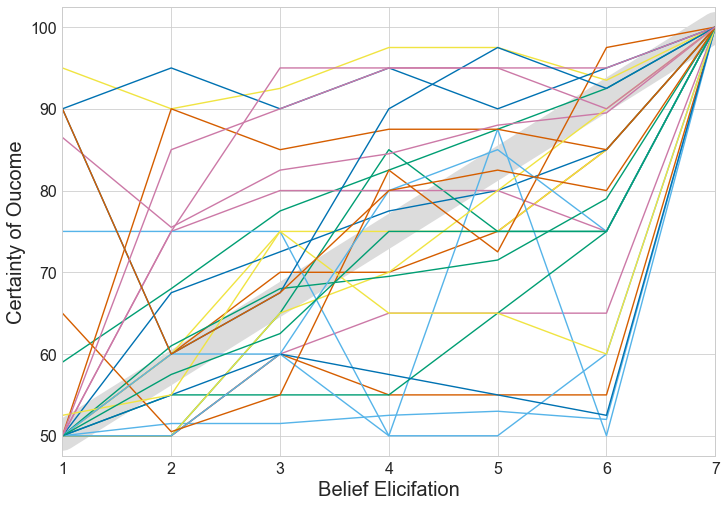

In [3]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="colorblind", style="whitegrid", font_scale=2)
plt.xlim(1, 7)
plt.xlabel('Belief Elicifation', fontsize=20)
plt.ylabel('Certainty of Oucome', fontsize=20)
optimalBelief = np.arange(50, 101, 50/6)
l = plt.plot(np.arange(1,8, 1), optimalBelief)
plt.setp(l, linewidth=30, color='gainsboro')
for col in range(1, len(f1df.columns) + 1):
    plt.plot(f1df[col])

### Figure 1. Line Plot (Gray Scale)

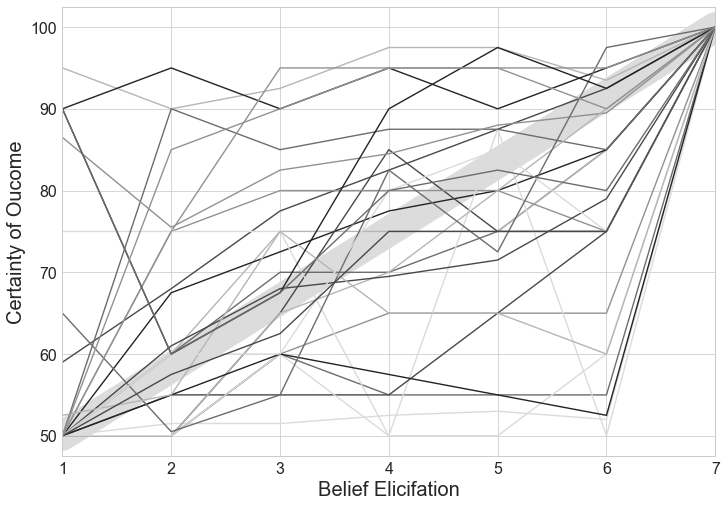

In [4]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="gray", style="whitegrid", font_scale=2)
optimalBelief = np.arange(50, 101, 50/6)
plt.xlim(1, 7)
plt.xlabel('Belief Elicifation', fontsize=20)
plt.ylabel('Certainty of Oucome', fontsize=20)
l = plt.plot(np.arange(1,8, 1), optimalBelief)
plt.setp(l, linewidth=30, color='gainsboro')
for col in range(1, len(f1df.columns) + 1):
    plt.plot(f1df[col])

## Figure 2. Subject Beliefs at Each Elicitation (Cowboys vs. Eagles Football Game):

### Figure 2. Data

In [5]:
f2df = pd.read_csv('data/figure_2.csv').drop("Subject Number", axis=1)
f2df.index = range(1, len(f2df) + 1)
f2df = f2df.transpose()
f2df.index = range(1, len(f2df) + 1)
f2df

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
1,75.0,100.0,75.0,60.0,56.0,50.0,50.0,70.0,50.0,50.0,...,70.0,60.0,69.0,50.0,50.0,50.0,75.0,85.0,NaN,NaN
2,80.0,100.0,75.0,60.0,55.0,53.0,50.0,65.0,67.0,50.0,...,73.0,65.0,68.0,50.0,50.0,75.0,65.0,85.0,NaN,NaN
3,75.0,100.0,75.0,63.0,70.0,53.0,60.0,75.0,60.0,50.0,...,70.0,60.0,69.0,50.0,62.0,50.0,75.0,90.0,NaN,NaN
4,80.0,100.0,75.0,55.0,87.0,53.0,80.0,80.0,60.0,50.0,...,70.0,67.0,73.0,50.0,65.0,65.0,76.0,85.0,NaN,NaN
5,86.0,100.0,75.0,51.0,90.0,50.0,83.0,84.0,55.0,50.0,...,55.0,60.0,63.0,59.0,56.0,65.0,80.0,90.0,NaN,NaN
6,80.0,100.0,75.0,50.0,94.0,60.0,86.0,85.0,55.0,50.0,...,52.0,73.0,66.0,70.0,50.0,60.0,88.0,90.0,NaN,NaN
7,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,50.0,...,99.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN


### Figure 2. Line Plot (White Background)

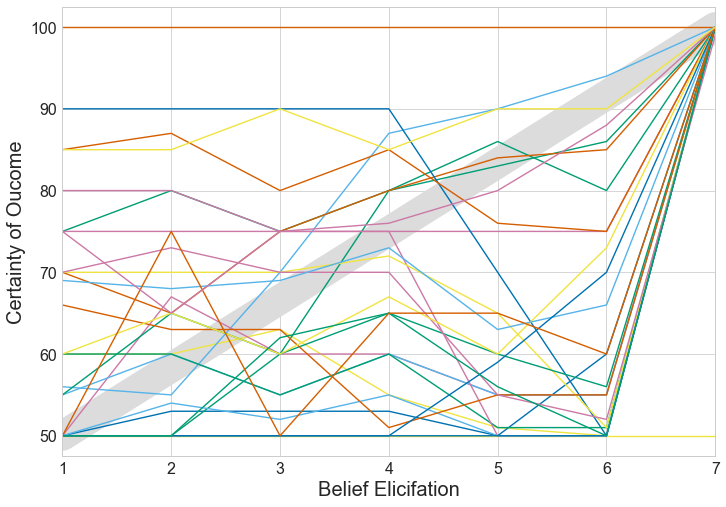

In [6]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="colorblind", style="whitegrid", font_scale=2)
plt.xlim(1, 7)
plt.xlabel('Belief Elicifation', fontsize=20)
plt.ylabel('Certainty of Oucome', fontsize=20)
l = plt.plot(np.arange(1,8, 1), optimalBelief)
plt.setp(l, linewidth=30, color='gainsboro')
for col in range(1, len(f2df.columns) + 1):
    plt.plot(f2df[col])

### Figure 2. Line Plot (Gray Scale)

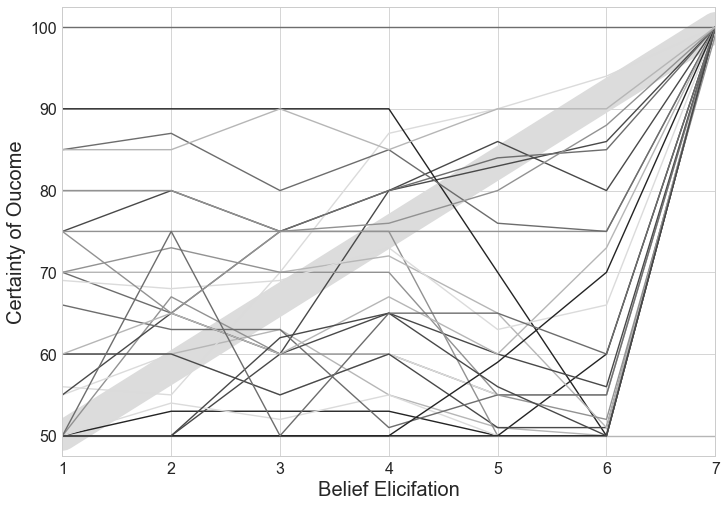

In [7]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="gray", style="whitegrid", font_scale=2)
optimalBelief = np.arange(50, 101, 50/6)
plt.xlim(1, 7)
plt.xlabel('Belief Elicifation', fontsize=20)
plt.ylabel('Certainty of Oucome', fontsize=20)
l = plt.plot(np.arange(1,8, 1), optimalBelief)
plt.setp(l, linewidth=30, color='gainsboro')
for col in range(1, len(f2df.columns) + 1):
    plt.plot(f2df[col])

## Figure 3: Subject Beliefs at Each Elicitation (Eagles vs. Saints Football Game)

### Figure 3. Data

In [8]:
f3df = pd.read_csv('data/figure_3.csv')
f3df.index = range(1, len(f3df) + 1)
f3df = f3df.transpose()
f3df.index = range(1, len(f3df) + 1)
f3df

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
1,100.0,50.0,50.0,58.0,70.0,55.0,50.0,69.0,70.0,75.0,...,70.0,95.0,70.0,90.0,75.0,80.0,60.0,97.0,56.0,NaN
2,100.0,51.0,50.0,61.0,75.0,51.0,50.0,50.0,50.0,75.0,...,50.0,97.0,60.0,90.0,71.0,70.0,50.0,98.0,57.0,NaN
3,100.0,60.0,60.0,61.0,70.0,50.0,50.0,65.0,55.0,70.0,...,75.0,96.0,60.0,90.0,75.0,80.0,60.0,98.0,59.0,NaN
4,100.0,60.0,55.0,61.0,65.0,50.0,50.0,57.0,60.0,75.0,...,60.0,97.0,60.0,89.0,70.0,70.0,55.0,98.0,50.0,NaN
5,100.0,60.0,75.0,71.0,50.0,50.0,65.0,79.0,70.0,55.0,...,95.0,85.0,60.0,95.0,85.0,80.0,75.0,98.0,55.0,NaN
6,100.0,51.0,70.0,65.0,55.0,50.0,60.0,57.0,50.0,55.0,...,75.0,85.0,55.0,94.0,75.0,55.0,70.0,98.0,56.0,NaN
7,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.0,100.0,NaN


### Figure 3. Line Plot (White Background)

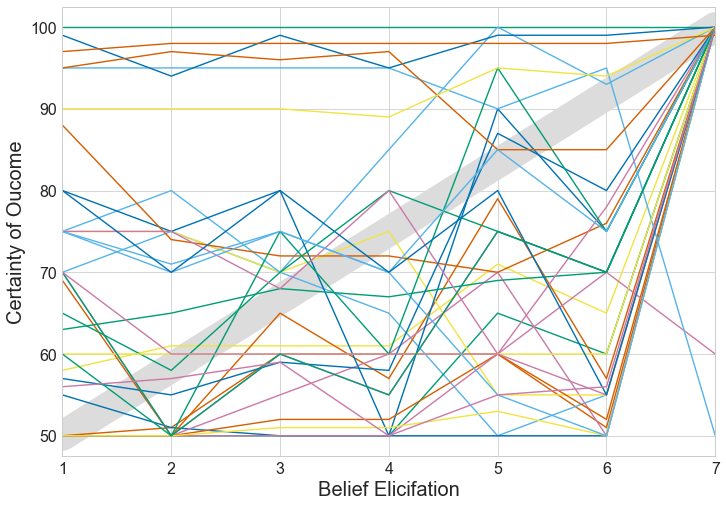

In [9]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="colorblind", style="whitegrid", font_scale=2)
plt.xlim(1, 7)
plt.xlabel('Belief Elicifation', fontsize=20)
plt.ylabel('Certainty of Oucome', fontsize=20)
l = plt.plot(np.arange(1,8, 1), optimalBelief)
plt.setp(l, linewidth=30, color='gainsboro')
for col in range(1, len(f3df.columns) + 1):
    plt.plot(f3df[col])

### Figure 3. Line Plot (Gray Scale)

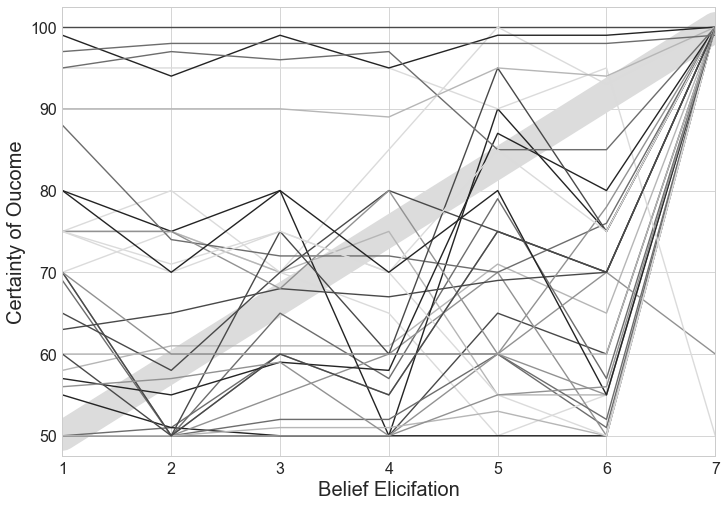

In [10]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="gray", style="whitegrid", font_scale=2)
optimalBelief = np.arange(50, 101, 50/6)
plt.xlim(1, 7)
plt.xlabel('Belief Elicifation', fontsize=20)
plt.ylabel('Certainty of Oucome', fontsize=20)
l = plt.plot(np.arange(1,8, 1), optimalBelief)
plt.setp(l, linewidth=30, color='gainsboro')
for col in range(1, len(f3df.columns) + 1):
    plt.plot(f3df[col])

## Figure 4: Cumulative Distribution of deviations from the Optimal Residual-Variance Path

### Figure 4. Data

In [10]:
f4df = pd.read_csv('data/figure_4.csv')
f4df

,EC,ES,C,RV
0,0.000000,0.000000,0.0,0.0000
1,0.034483,0.030303,0.0,0.0002
2,0.034483,0.030303,0.0,0.0004
3,0.034483,0.030303,0.0,0.0006
4,0.034483,0.030303,0.0,0.0008
5,0.034483,0.030303,0.0,0.0010
6,0.034483,0.030303,0.0,0.0012
7,0.034483,0.030303,0.0,0.0014
8,0.034483,0.030303,0.0,0.0016
9,0.034483,0.030303,0.0,0.0018


### Figure 4. Line Plot (White Background)

In [12]:
f4df.columns = ['ce', 'es', 'c','rv']

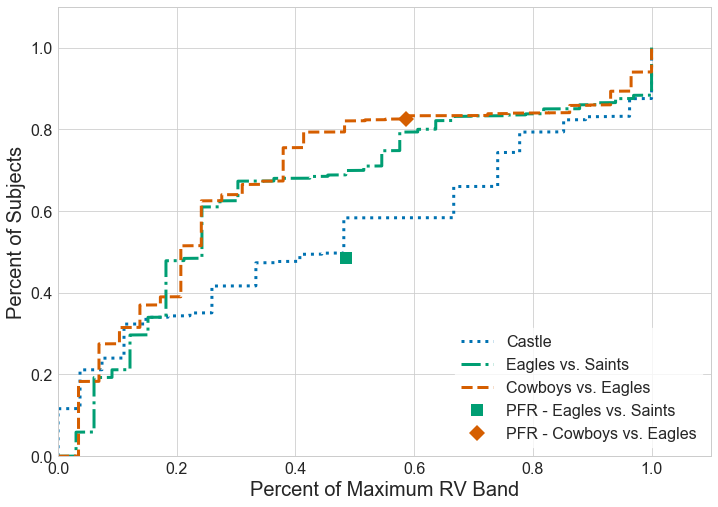

In [15]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="colorblind", style="whitegrid", font_scale=2)
plt.xlim(0, 1.1, 0.05)
plt.ylim(0, 1.1, 0.1)
plt.xlabel('Percent of Maximum RV Band', fontsize=20)
plt.ylabel('Percent of Subjects', fontsize=20)
l1, = plt.plot(f4df['c'], f4df['rv'], label='Castle', linestyle=":")
l2, = plt.plot(f4df['es'], f4df['rv'], label='Eagles vs. Saints', linestyle="-.")
l3, = plt.plot(f4df['ce'], f4df['rv'], label='Cowboys vs. Eagles', linestyle="--")
plt.setp(l1, linewidth=3)
plt.setp(l2, linewidth=3)
plt.setp(l3, linewidth=3)

p1, = plt.plot(f4df['es'][3456], f4df['es'][3456], marker='s', markersize=12, linestyle='none', color=l2.get_color(), label='PFR - Eagles vs. Saints')
p2, = plt.plot(f4df['ce'][4131], f4df['rv'][4131], marker='D', markersize=12, linestyle='none', color=l3.get_color(), label='PFR - Cowboys vs. Eagles')

legend = plt.legend(handles=[l1, l2, l3, p1, p2], frameon=1)

frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')

### Figure 4. Line Plot (Gray Scale)

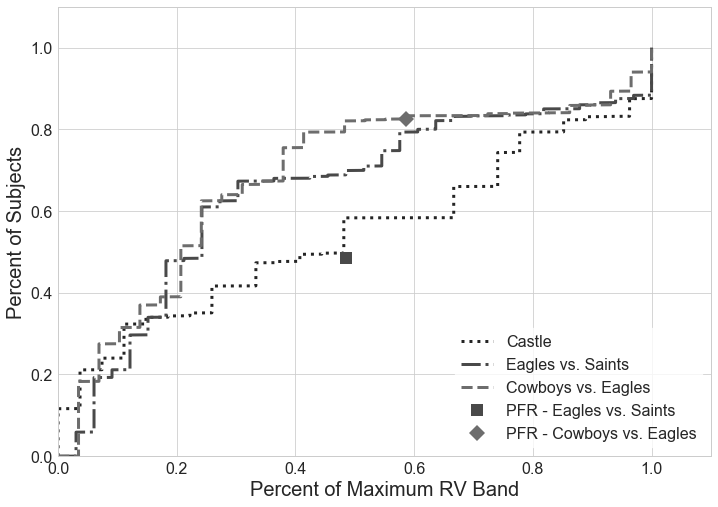

In [16]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="gray", style="whitegrid", font_scale=2)
plt.xlim(0, 1.1, 0.05)
plt.ylim(0, 1.1, 0.1)
plt.xlabel('Percent of Maximum RV Band', fontsize=20)
plt.ylabel('Percent of Subjects', fontsize=20)
l1, = plt.plot(f4df['c'], f4df['rv'], label='Castle', linestyle=":")
l2, = plt.plot(f4df['es'], f4df['rv'], label='Eagles vs. Saints', linestyle="-.")
l3, = plt.plot(f4df['ce'], f4df['rv'], label='Cowboys vs. Eagles', linestyle="--")
plt.setp(l1, linewidth=3)
plt.setp(l2, linewidth=3)
plt.setp(l3, linewidth=3)

p1, = plt.plot(f4df['es'][3456], f4df['es'][3456], marker='s', markersize=12, linestyle='none', color=l2.get_color(), label='PFR - Eagles vs. Saints')
p2, = plt.plot(f4df['ce'][4131], f4df['rv'][4131], marker='D', markersize=12, linestyle='none', color=l3.get_color(), label='PFR - Cowboys vs. Eagles')

legend = plt.legend(handles=[l1, l2, l3, p1, p2], frameon=1)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')

## Figure 5: Cumulative Distribution of Average Surprise

### Figure 5. Data

In [40]:
f5df = pd.read_csv('data/figure_5.csv')
f5df

,Surprise,Castle,Saints vs Eagles,Cowboys vs Eagles
0,0,0.0,0.058824,0.000000
1,1,0.0,0.088235,0.068966
2,2,0.0,0.088235,0.068966
3,3,0.0,0.088235,0.068966
4,4,0.0,0.088235,0.068966
5,5,0.0,0.088235,0.068966
6,6,0.0,0.088235,0.068966
7,7,0.0,0.088235,0.068966
8,8,0.0,0.088235,0.068966
9,9,0.0,0.088235,0.068966


### Figure 5. Line Plot (White Background)

In [43]:
f5df.columns = ['s', 'c', 'se', 'ce']
maxs = f5df['s'].max()
f5df.loc[:,'s'] /= maxs
f5df

,s,c,se,ce
0,0.000000,0.0,0.058824,0.000000
1,0.000279,0.0,0.088235,0.068966
2,0.000558,0.0,0.088235,0.068966
3,0.000838,0.0,0.088235,0.068966
4,0.001117,0.0,0.088235,0.068966
5,0.001396,0.0,0.088235,0.068966
6,0.001675,0.0,0.088235,0.068966
7,0.001954,0.0,0.088235,0.068966
8,0.002233,0.0,0.088235,0.068966
9,0.002513,0.0,0.088235,0.068966


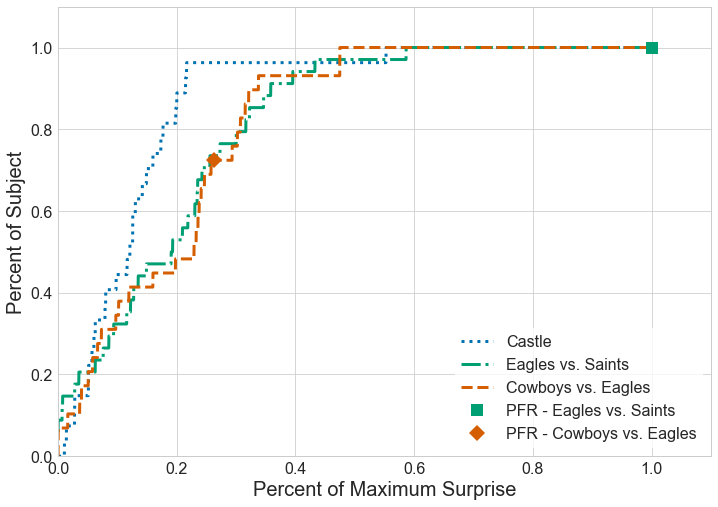

In [45]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="colorblind", style="whitegrid", font_scale=2)
plt.xlim(0, 1.1, 0.2)
plt.ylim(0, 1.1, 0.1)
plt.xlabel('Percent of Maximum Surprise', fontsize=20)
plt.ylabel('Percent of Subject', fontsize=20)
l1, = plt.plot(f5df['s'], f5df['c'], label='Castle', linestyle=":")
l2, = plt.plot(f5df['s'], f5df['se'], label='Eagles vs. Saints', linestyle="-.")
l3, = plt.plot(f5df['s'], f5df['ce'], label='Cowboys vs. Eagles', linestyle="--")
plt.setp(l1, linewidth=3)
plt.setp(l2, linewidth=3)
plt.setp(l3, linewidth=3)

p1, = plt.plot([3582/maxs], [1], marker='s', markersize=12, linestyle='none', color=l2.get_color(), label='PFR - Eagles vs. Saints')
p2, = plt.plot([944/maxs], [0.724], marker='D', markersize=12, linestyle='none', color=l3.get_color(), label='PFR - Cowboys vs. Eagles')

legend = plt.legend(handles=[l1, l2, l3, p1, p2], frameon=1)

frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')

### Figure 5. Line Plot (Gray Scale)

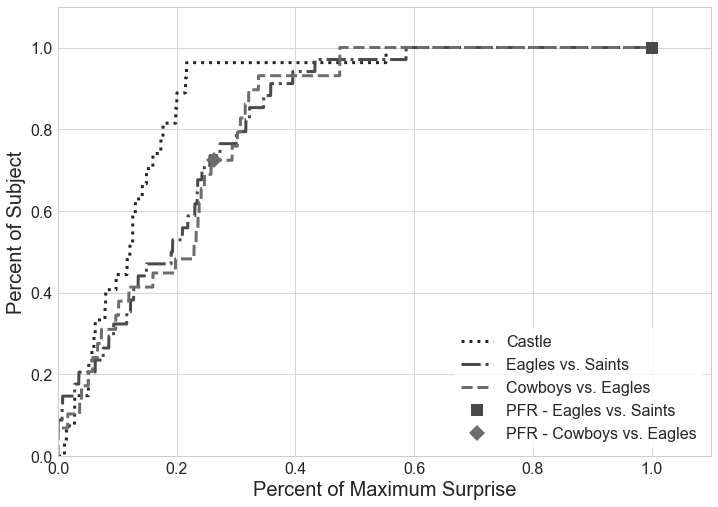

In [46]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="gray", style="whitegrid", font_scale=2)
plt.xlim(0, 1.1, 0.2)
plt.ylim(0, 1.1, 0.1)
plt.xlabel('Percent of Maximum Surprise', fontsize=20)
plt.ylabel('Percent of Subject', fontsize=20)
l1, = plt.plot(f5df['s'], f5df['c'], label='Castle', linestyle=":")
l2, = plt.plot(f5df['s'], f5df['se'], label='Eagles vs. Saints', linestyle="-.")
l3, = plt.plot(f5df['s'], f5df['ce'], label='Cowboys vs. Eagles', linestyle="--")
plt.setp(l1, linewidth=3)
plt.setp(l2, linewidth=3)
plt.setp(l3, linewidth=3)

p1, = plt.plot([3582/maxs], [1], marker='s', markersize=12, linestyle='none', color=l2.get_color(), label='PFR - Eagles vs. Saints')
p2, = plt.plot([944/maxs], [0.724], marker='D', markersize=12, linestyle='none', color=l3.get_color(), label='PFR - Cowboys vs. Eagles')

legend = plt.legend(handles=[l1, l2, l3, p1, p2], frameon=1)

frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')


## Appendix Figure 1: Eagles vs. Saints 

### Data

In [19]:
appendix1 = pd.read_csv('data/appendix_1.csv')
appendix1.index = range(1, len(appendix1) + 1)
appendix1 = appendix1.transpose()
appendix1

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
1,100.0,0.0,50.0,50.0,42.0,70.0,55.0,50.0,31.0,30.0,...,43.0,30.0,95.0,70.0,10.0,25.0,20.0,60.0,3.0,44.0
2,100.0,0.0,50.0,50.0,48.0,70.0,50.0,50.0,31.0,30.0,...,44.0,5.0,95.0,60.0,10.0,25.0,20.0,60.0,3.0,43.0
3,100.0,0.0,50.0,NaN,NaN,80.0,NaN,NaN,50.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.0,NaN,50.0,40.0,NaN,50.0,50.0,NaN,NaN,...,53.0,50.0,96.0,65.0,10.0,30.0,30.0,NaN,0.0,43.0
5,NaN,0.0,NaN,NaN,NaN,NaN,51.0,NaN,50.0,50.0,...,45.0,50.0,NaN,60.0,10.0,29.0,30.0,50.0,0.0,43.0
6,100.0,0.0,51.0,50.0,39.0,75.0,NaN,50.0,NaN,NaN,...,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN
7,NaN,0.0,50.0,50.0,39.0,80.0,50.0,50.0,45.0,50.0,...,58.0,60.0,96.0,60.0,10.0,29.0,30.0,50.0,2.0,43.0
8,100.0,0.0,40.0,40.0,39.0,70.0,50.0,50.0,35.0,55.0,...,41.0,25.0,NaN,NaN,10.0,25.0,20.0,40.0,0.0,41.0
9,NaN,0.0,40.0,45.0,39.0,80.0,NaN,50.0,60.0,60.0,...,40.0,75.0,98.0,70.0,10.0,40.0,35.0,60.0,2.0,51.0
10,100.0,0.0,40.0,45.0,39.0,65.0,50.0,50.0,43.0,60.0,...,42.0,60.0,97.0,60.0,11.0,30.0,30.0,55.0,2.0,50.0


### PFR - Data

In [20]:
appendix1_pfr = pd.read_csv('data/appendix_1_pfr.csv')
appendix1_pfr

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,56.7,58,56,64.5,64.5,62,47.4,47.6,65,62.8,31.6,7.8,7.8,34,15.2,62.5,0


### Average - Data

In [21]:
appendix1_avg = pd.read_csv('data/appendix_1_avg.csv')
appendix1_avg

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,46.882353,46.03125,51.923077,45.217391,41.2,55.363636,47.666667,41.6,50.483871,48.882353,44.032258,35.424242,41.588235,43.666667,38.75,50.090909,4.441176


### Figure 1 (Color)

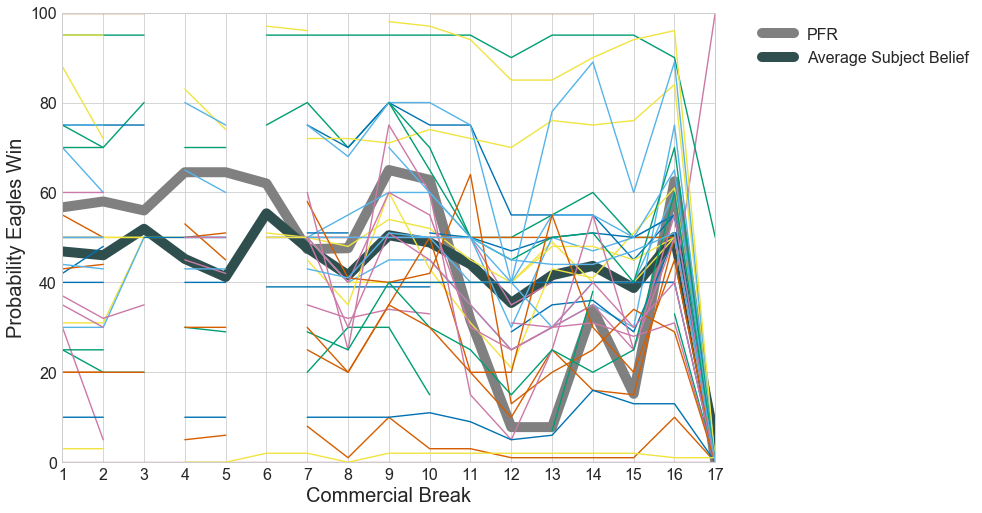

In [22]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="colorblind", style="whitegrid", font_scale=2)
plt.xlim(1, 17)
plt.ylim(0, 100)
plt.xticks(np.arange(1,18))
plt.xlabel('Commercial Break', fontsize=20)
plt.ylabel('Probability Eagles Win', fontsize=20)

pfrl,  = plt.plot(np.arange(1, 18, 1), appendix1_pfr.transpose(), label="PFR")
plt.setp(pfrl, linewidth=10, color='gray')
avgl,  = plt.plot(np.arange(1, 18, 1), appendix1_avg.transpose(), label="Average Subject Belief")
plt.setp(avgl, linewidth=10, color='darkslategray')
for col in range(1, len(appendix1.columns) + 1):
    plt.plot(appendix1[col])


legend = plt.legend(handles=[pfrl, avgl], frameon=1, bbox_to_anchor=(1.05, 1), loc=2)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')


### 1: Figure 1 (Gray Scale)

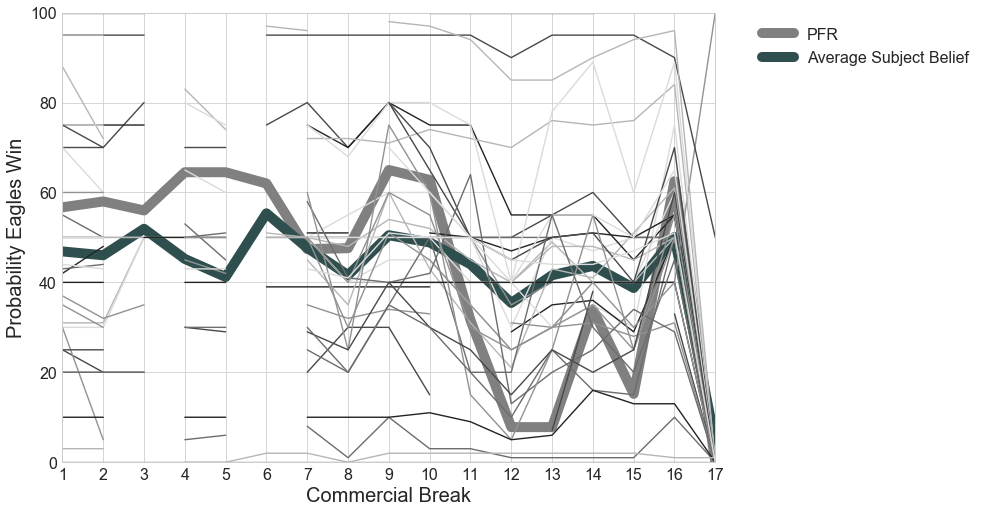

In [23]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="gray", style="whitegrid", font_scale=2)
plt.xlim(1, 17)
plt.ylim(0, 100)
plt.xticks(np.arange(1,18))
plt.xlabel('Commercial Break', fontsize=20)
plt.ylabel('Probability Eagles Win', fontsize=20)

pfrl,  = plt.plot(np.arange(1, 18, 1), appendix1_pfr.transpose(), label="PFR")
plt.setp(pfrl, linewidth=10, color='gray')
avgl,  = plt.plot(np.arange(1, 18, 1), appendix1_avg.transpose(), label="Average Subject Belief")
plt.setp(avgl, linewidth=10, color='darkslategray')
for col in range(1, len(appendix1.columns) + 1):
    plt.plot(appendix1[col])


legend = plt.legend(handles=[pfrl, avgl], frameon=1, bbox_to_anchor=(1.05, 1), loc=2)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')



## Appendix Figure 2: Cowboys vs. Eagles

### Data

In [24]:
appendix2 = pd.read_csv('data/appendix_2.csv')
appendix2.index = range(1, len(appendix2) + 1)
appendix2 = appendix2.transpose()
appendix2

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
1,75.0,100.0,60.0,75.0,50.0,50.0,NaN,NaN,36.0,50.0,...,NaN,NaN,NaN,NaN,70.0,NaN,NaN,50.0,25.0,10.0
2,75.0,100.0,70.0,75.0,60.0,44.0,50.0,50.0,30.0,50.0,...,34.0,70.0,60.0,69.0,66.0,50.0,50.0,50.0,25.0,15.0
3,80.0,100.0,67.0,75.0,60.0,55.0,53.0,50.0,35.0,67.0,...,37.0,73.0,65.0,68.0,75.0,50.0,50.0,75.0,35.0,15.0
4,80.0,100.0,65.0,75.0,70.0,75.0,56.0,79.0,37.0,80.0,...,40.0,73.0,68.0,83.0,90.0,50.0,65.0,67.0,50.0,15.0
5,75.0,100.0,60.0,75.0,63.0,30.0,53.0,61.0,25.0,60.0,...,37.0,70.0,60.0,69.0,80.0,50.0,62.0,50.0,25.0,10.0
6,75.0,100.0,50.0,75.0,55.0,19.0,50.0,80.0,20.0,60.0,...,45.0,70.0,66.0,71.0,75.0,50.0,70.0,NaN,16.0,10.0
7,80.0,100.0,65.0,75.0,55.0,13.0,53.0,80.0,20.0,60.0,...,51.0,70.0,67.0,73.0,25.0,50.0,65.0,65.0,24.0,15.0
8,90.0,100.0,55.0,75.0,52.0,9.0,53.0,81.0,17.0,60.0,...,55.0,65.0,68.0,74.0,7.0,50.0,60.0,70.0,10.0,15.0
9,86.0,100.0,50.0,75.0,51.0,10.0,50.0,83.0,16.0,55.0,...,55.0,55.0,60.0,63.0,6.0,41.0,56.0,65.0,20.0,10.0
10,80.0,100.0,55.0,75.0,50.0,6.0,40.0,86.0,15.0,55.0,...,55.0,52.0,73.0,66.0,NaN,30.0,50.0,60.0,12.0,10.0


### PFR - Data

In [25]:
appendix2_pfr = pd.read_csv('data/appendix_2_pfr.csv')
appendix2_pfr

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,69,75,89.7,92.2,76.4,82.1,87.1,82.6,65.4,65.1,74.7,96,74.7,68.9,100


### Average - Data

In [26]:
appendix2_avg = pd.read_csv('data/appendix_2_avg.csv')
appendix2_avg

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,57.277778,57.666667,61.7,66.766667,58.4,58.206897,58.933333,56.133333,52.8,52,55.758621,68.862069,62.793103,55.62069,98.241379


### 1: Figure 2 (Color)

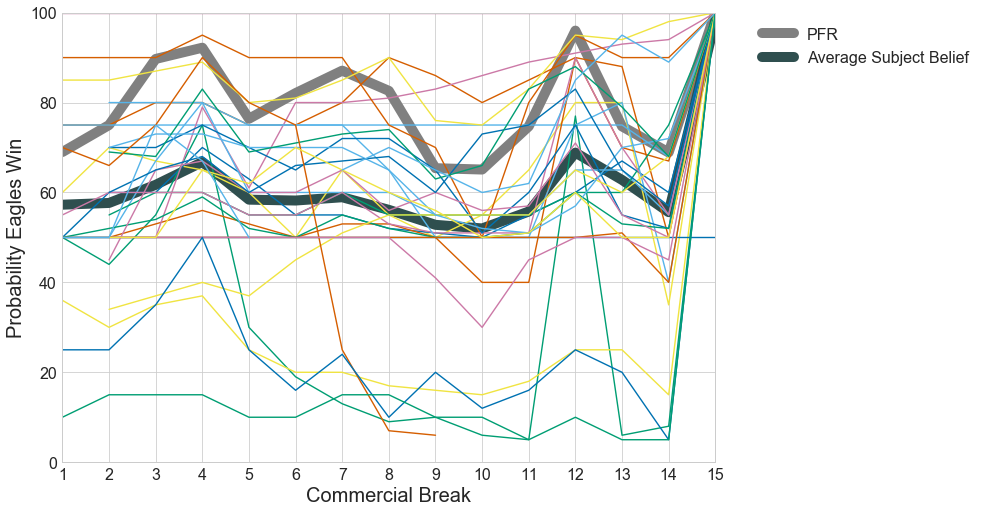

In [27]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="colorblind", style="whitegrid", font_scale=2)
plt.xlim(1, 15)
plt.ylim(0, 100)
plt.xticks(np.arange(1,16))
plt.xlabel('Commercial Break', fontsize=20)
plt.ylabel('Probability Eagles Win', fontsize=20)

pfrl,  = plt.plot(np.arange(1, 16, 1), appendix2_pfr.transpose(), label="PFR")
plt.setp(pfrl, linewidth=10, color='gray')
avgl,  = plt.plot(np.arange(1, 16, 1), appendix2_avg.transpose(), label="Average Subject Belief")
plt.setp(avgl, linewidth=10, color='darkslategray')
for col in range(1, len(appendix2.columns) + 1):
    plt.plot(appendix2[col])


legend = plt.legend(handles=[pfrl, avgl], frameon=1, bbox_to_anchor=(1.05, 1), loc=2)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')


### Figure 2 (Gray Scale)

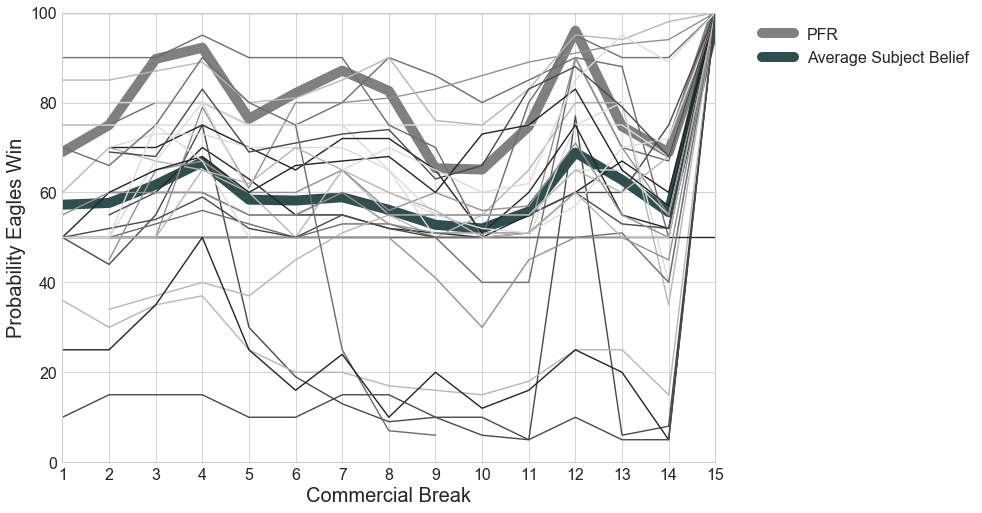

In [28]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="gray", style="whitegrid", font_scale=2)
plt.xlim(1, 15)
plt.ylim(0, 100)
plt.xticks(np.arange(1,16))
plt.xlabel('Commercial Break', fontsize=20)
plt.ylabel('Probability Eagles Win', fontsize=20)

pfrl,  = plt.plot(np.arange(1, 16, 1), appendix2_pfr.transpose(), label="PFR")
plt.setp(pfrl, linewidth=10, color='gray')
avgl,  = plt.plot(np.arange(1, 16, 1), appendix2_avg.transpose(), label="Average Subject Belief")
plt.setp(avgl, linewidth=10, color='darkslategray')
for col in range(1, len(appendix2.columns) + 1):
    plt.plot(appendix2[col])


legend = plt.legend(handles=[pfrl, avgl], frameon=1, bbox_to_anchor=(1.05, 1), loc=2)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')

